<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/homework_1/fastai_ex_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'CMPE258/fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
from fastai.basics import *

#  Linear Regression problem

In [0]:
n=200

In [6]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.8718,  1.0000],
        [ 0.5387,  1.0000],
        [-0.3429,  1.0000],
        [-0.6536,  1.0000],
        [-0.2976,  1.0000]])

In [7]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

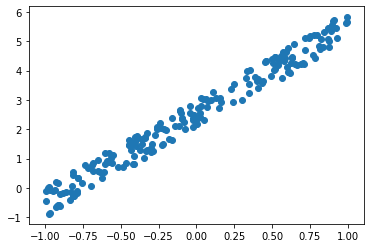

In [9]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [12]:
y_hat = x@a
mse(y_hat, y)

tensor(7.6121)

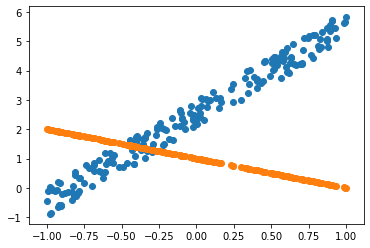

In [13]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# Gradient Descent

In [26]:
a = nn.Parameter(a); a


Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()        

In [16]:
lr = 1e-1
for t in range(100): update()

tensor(7.6121, grad_fn=<MeanBackward0>)
tensor(1.4932, grad_fn=<MeanBackward0>)
tensor(0.4130, grad_fn=<MeanBackward0>)
tensor(0.1634, grad_fn=<MeanBackward0>)
tensor(0.1048, grad_fn=<MeanBackward0>)
tensor(0.0910, grad_fn=<MeanBackward0>)
tensor(0.0878, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0869, grad_fn=<MeanBackward0>)
tensor(0.0868, grad_fn=<MeanBackward0>)


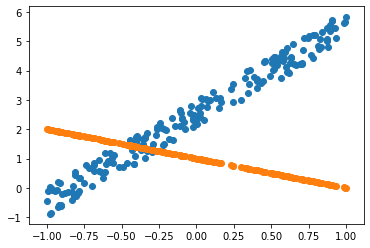

In [27]:
with torch.no_grad():
    plt.scatter(x[:,0],y)
    plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')
from fastai.basics import *

RuntimeError: ignored

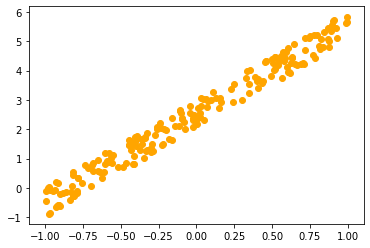

In [51]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)